# Exploratory Data Analysis of Audio Leak Data

This notebook performs an exploratory data analysis (EDA) on the water leak audio dataset. The dataset is divided into four categories:
- Leak-Metal
- Leak-NonMetal
- NoLeak-Metal
- NoLeak-NonMetal

We will analyze audio properties, visualize waveforms and spectrograms to understand the characteristics of each class.


In [2]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')


In [3]:
# Define the path to the audio files
audio_dir = 'Audios para Treinamento'

# Get the list of classes (subdirectories)
classes = [d for d in os.listdir(audio_dir) if os.path.isdir(os.path.join(audio_dir, d))]
print(f"Classes: {classes}")

# Create a list of dictionaries with file paths and labels
audio_files = []
for c in classes:
    class_dir = os.path.join(audio_dir, c)
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.wav'):
            audio_files.append({
                'path': os.path.join(class_dir, file_name),
                'label': c
            })

# Create a pandas DataFrame
df = pd.DataFrame(audio_files)

# Display the first few rows of the DataFrame
print(f"Number of audio files: {len(df)}")
df.head()


Classes: ['Leak-Metal', 'Leak-NonMetal', 'NoLeak-Metal', 'NoLeak-NonMetal']
Number of audio files: 60


,path,label
0,Audios para Treinamento\Leak-Metal\003_05593-2...,Leak-Metal
1,Audios para Treinamento\Leak-Metal\004_07573-2...,Leak-Metal
2,Audios para Treinamento\Leak-Metal\005_07573-2...,Leak-Metal
3,Audios para Treinamento\Leak-Metal\006_07573-2...,Leak-Metal
4,Audios para Treinamento\Leak-Metal\007_07573-2...,Leak-Metal


In [4]:
def get_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, mono=False)
        duration = librosa.get_duration(y=y, sr=sr)
        n_samples = y.shape[-1]
        if y.ndim == 1:
            channels = 1
        else:
            channels = y.shape[0]
        return pd.Series([duration, sr, channels, n_samples], index=['duration', 'sample_rate', 'channels', 'n_samples'])
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return pd.Series([None, None, None, None], index=['duration', 'sample_rate', 'channels', 'n_samples'])

# Apply the function to the DataFrame
features_df = df['path'].apply(get_audio_features)

# Concatenate the features with the original DataFrame
df = pd.concat([df, features_df], axis=1)

# Display summary statistics
df.describe()


,duration,sample_rate,channels,n_samples
count,60.000000,60.0,60.0,60.000000
mean,14.500000,22050.0,1.0,319725.000000
std,5.016921,0.0,0.0,110623.097513
min,10.000000,22050.0,1.0,220500.000000
25%,10.000000,22050.0,1.0,220500.000000
50%,10.000000,22050.0,1.0,220500.000000
75%,20.000000,22050.0,1.0,441000.000000
max,20.000000,22050.0,1.0,441000.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   path         60 non-null     object 
 1   label        60 non-null     object 
 2   duration     60 non-null     float64
 3   sample_rate  60 non-null     float64
 4   channels     60 non-null     float64
 5   n_samples    60 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.9+ KB


In [6]:
# Display the distribution of labels
df['label'].value_counts()


label
Leak-Metal         15
Leak-NonMetal      15
NoLeak-Metal       15
NoLeak-NonMetal    15
Name: count, dtype: int64

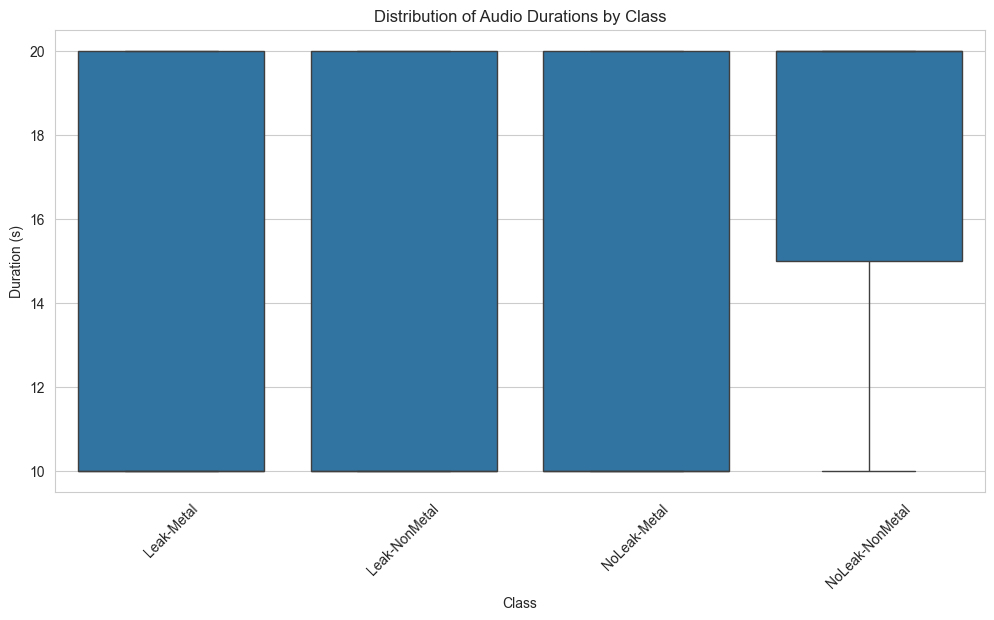

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='duration', data=df)
plt.title('Distribution of Audio Durations by Class')
plt.xlabel('Class')
plt.ylabel('Duration (s)')
plt.xticks(rotation=45)
plt.show()


C:\Users\fe_de\AppData\Local\Temp\ipykernel_38672\1413596034.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('label').apply(lambda x: x.sample(n_samples)).reset_index(drop=True)


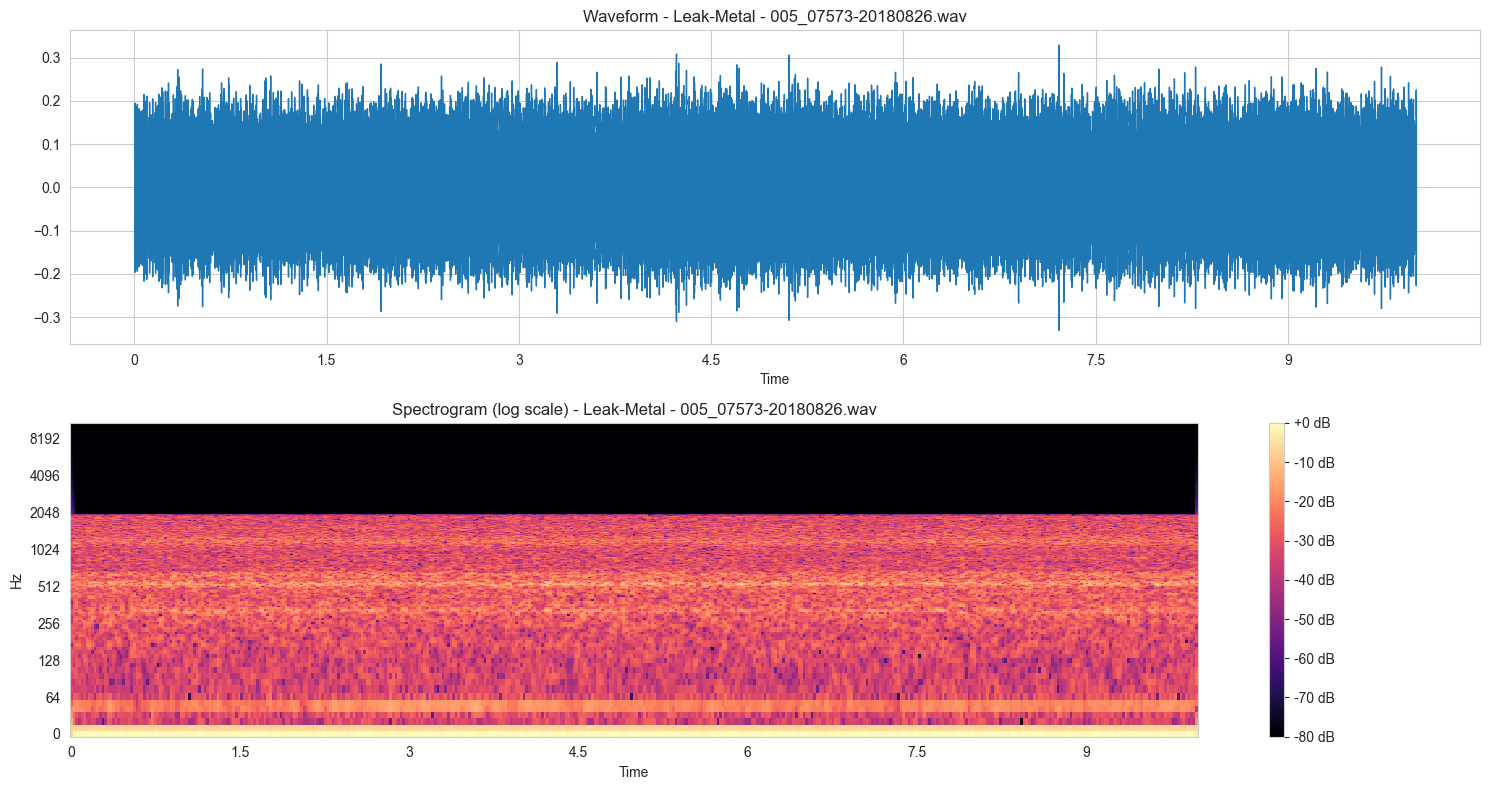

Audio player for Leak-Metal:


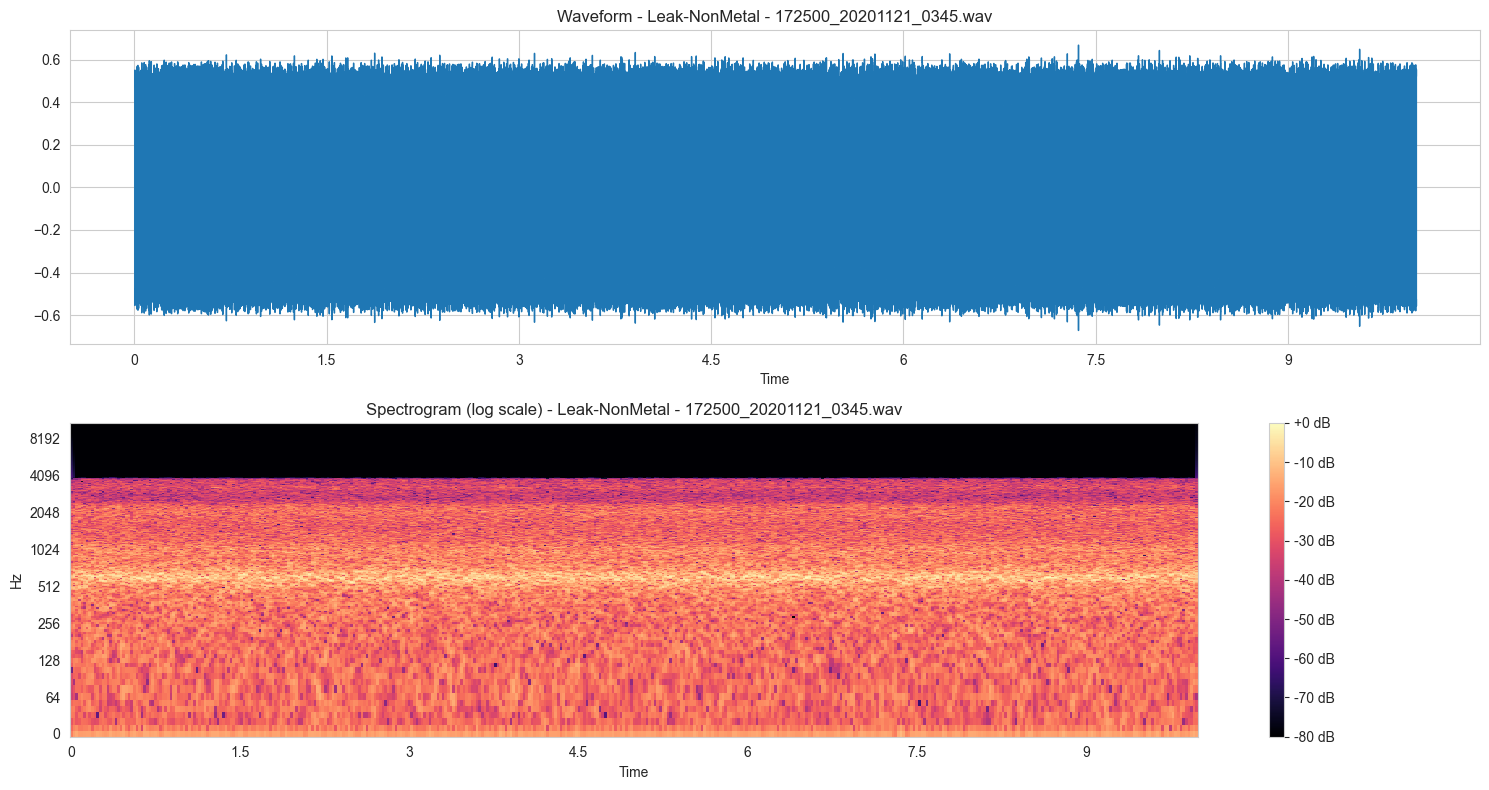

Audio player for Leak-NonMetal:


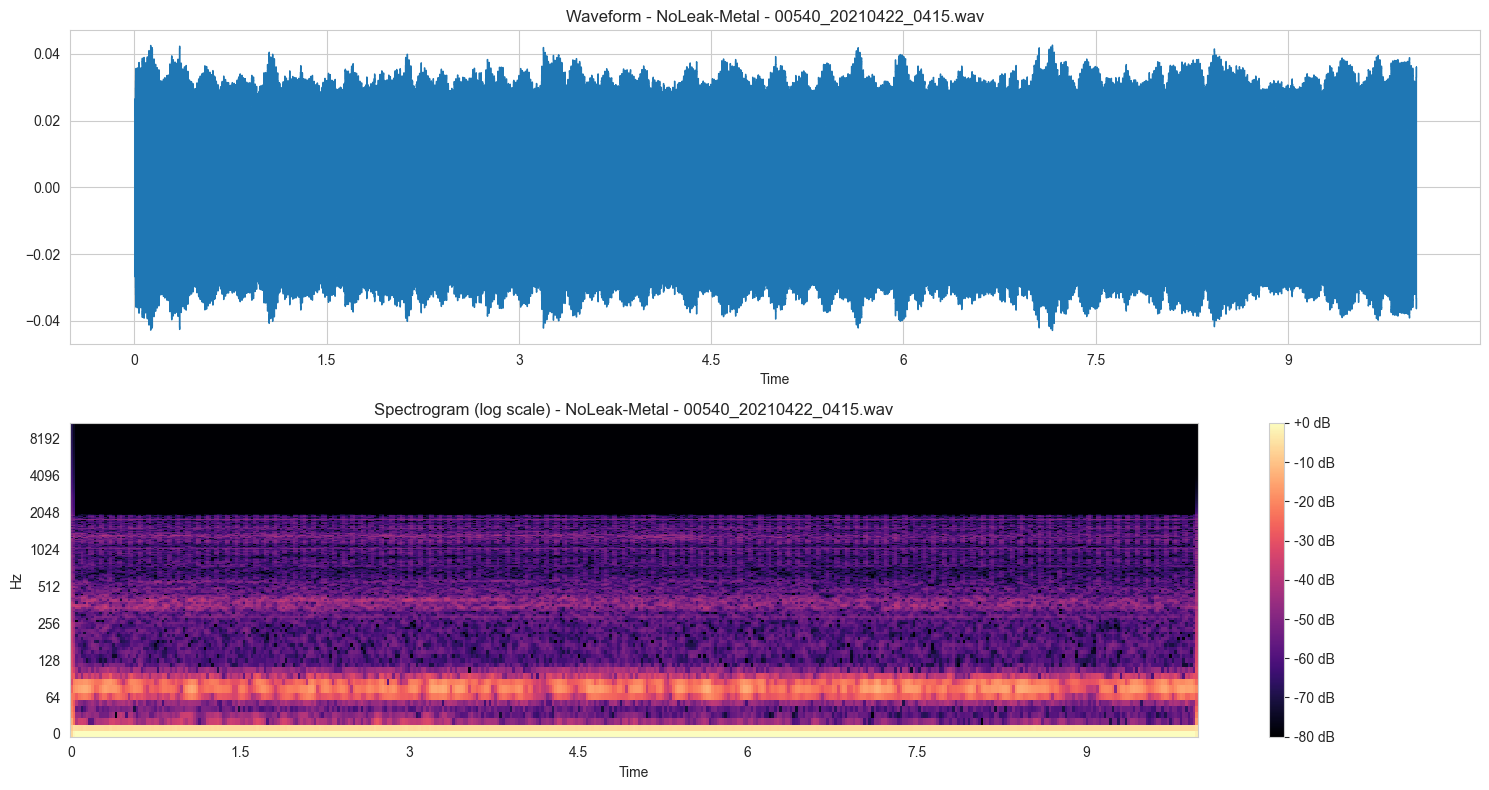

Audio player for NoLeak-Metal:


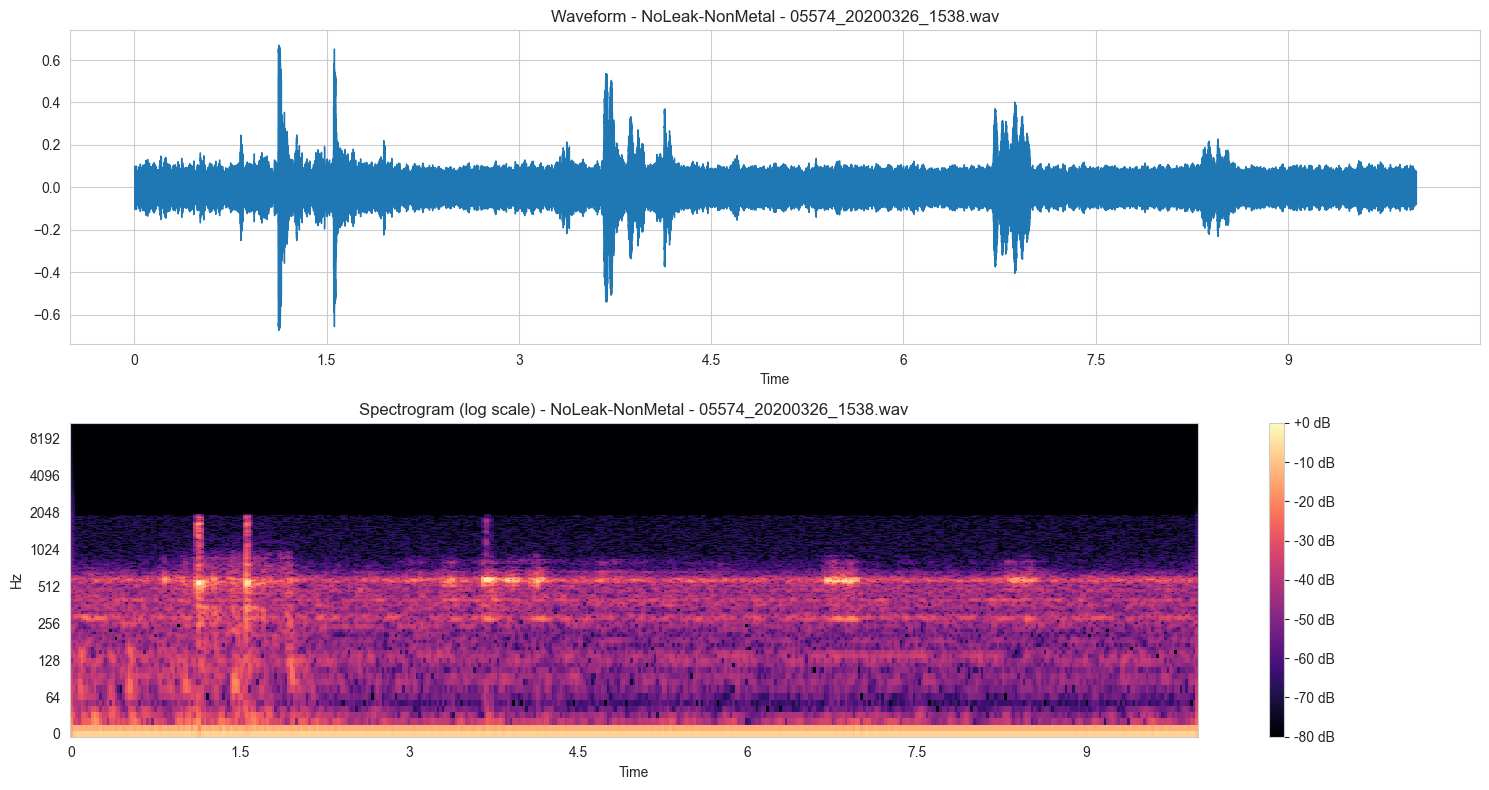

Audio player for NoLeak-NonMetal:


In [9]:
def plot_waveform_spectrogram(df, n_samples=1):
    # Get n_samples from each class
    sample_df = df.groupby('label').apply(lambda x: x.sample(n_samples)).reset_index(drop=True)
    
    for i, row in sample_df.iterrows():
        path = row['path']
        label = row['label']
        
        try:
            y, sr = librosa.load(path)
            
            plt.figure(figsize=(15, 8))
            
            # Plot waveform
            plt.subplot(2, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title(f'Waveform - {label} - {os.path.basename(path)}')
            
            # Plot spectrogram
            plt.subplot(2, 1, 2)
            D = librosa.stft(y)
            S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Spectrogram (log scale) - {label} - {os.path.basename(path)}')
            
            plt.tight_layout()
            plt.show()

            # Add an audio player
            print(f"Audio player for {label}:")
            display(Audio(data=y, rate=sr))

        except Exception as e:
            print(f"Could not process file {path}. Error: {e}")

# Plot one sample from each class
plot_waveform_spectrogram(df, n_samples=1)


C:\Users\fe_de\AppData\Local\Temp\ipykernel_38672\4102432938.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('label').apply(lambda x: x.sample(n_samples)).reset_index(drop=True)


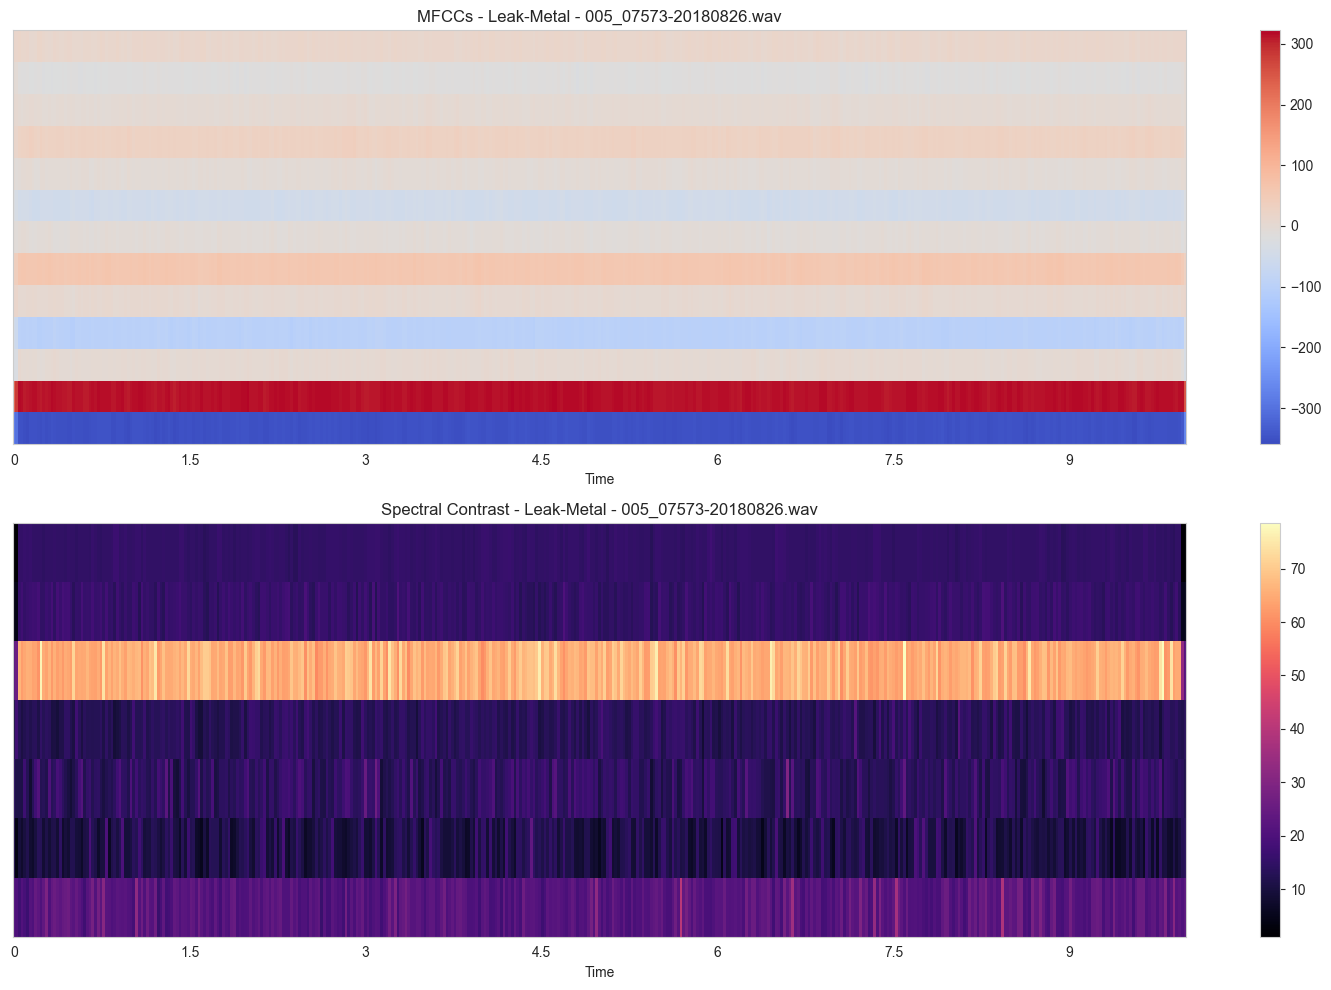

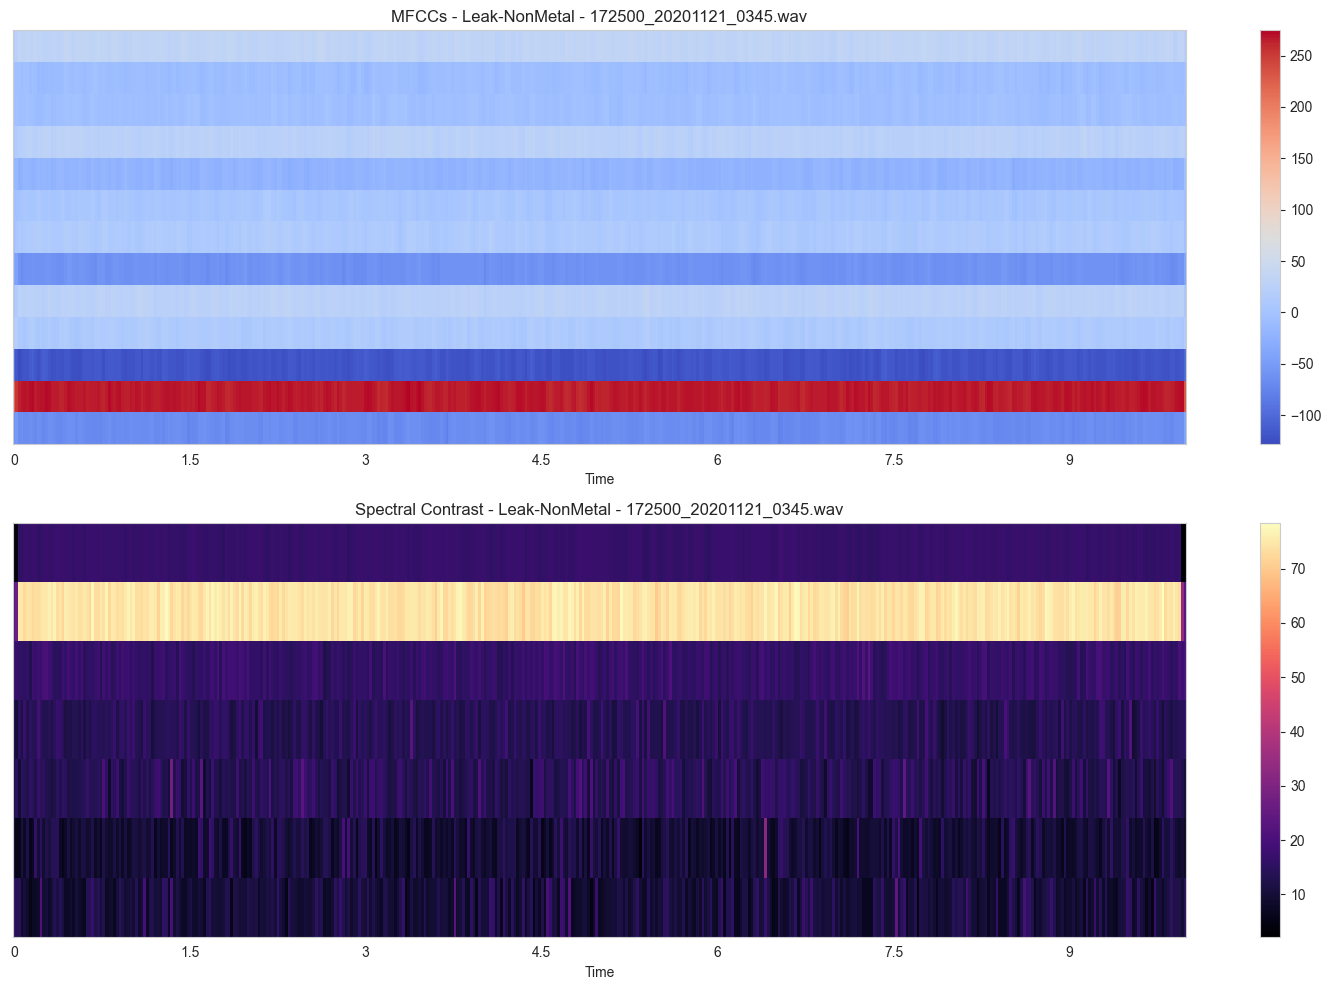

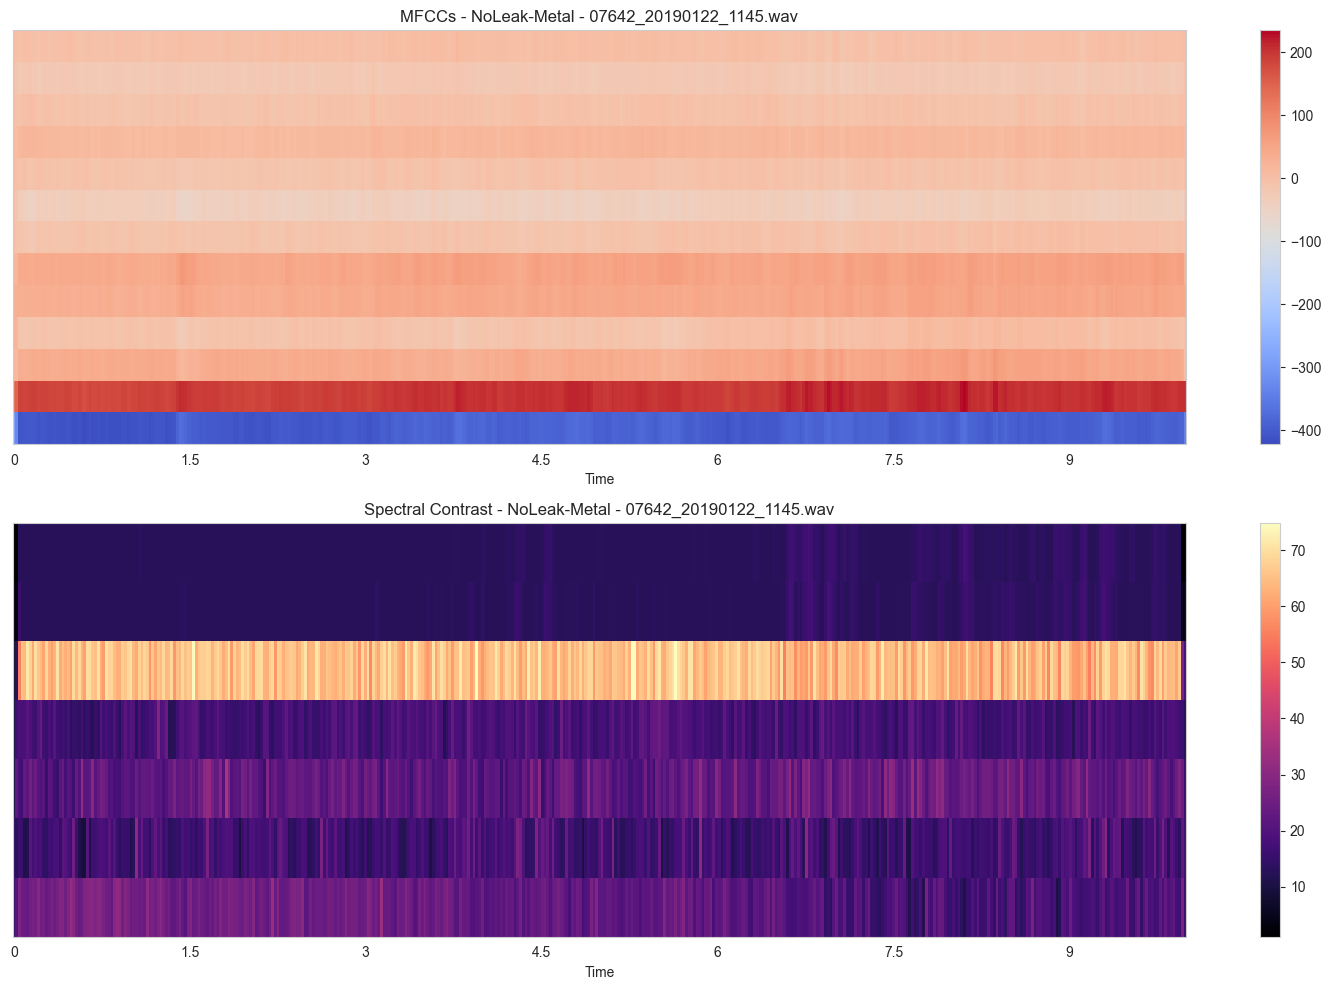

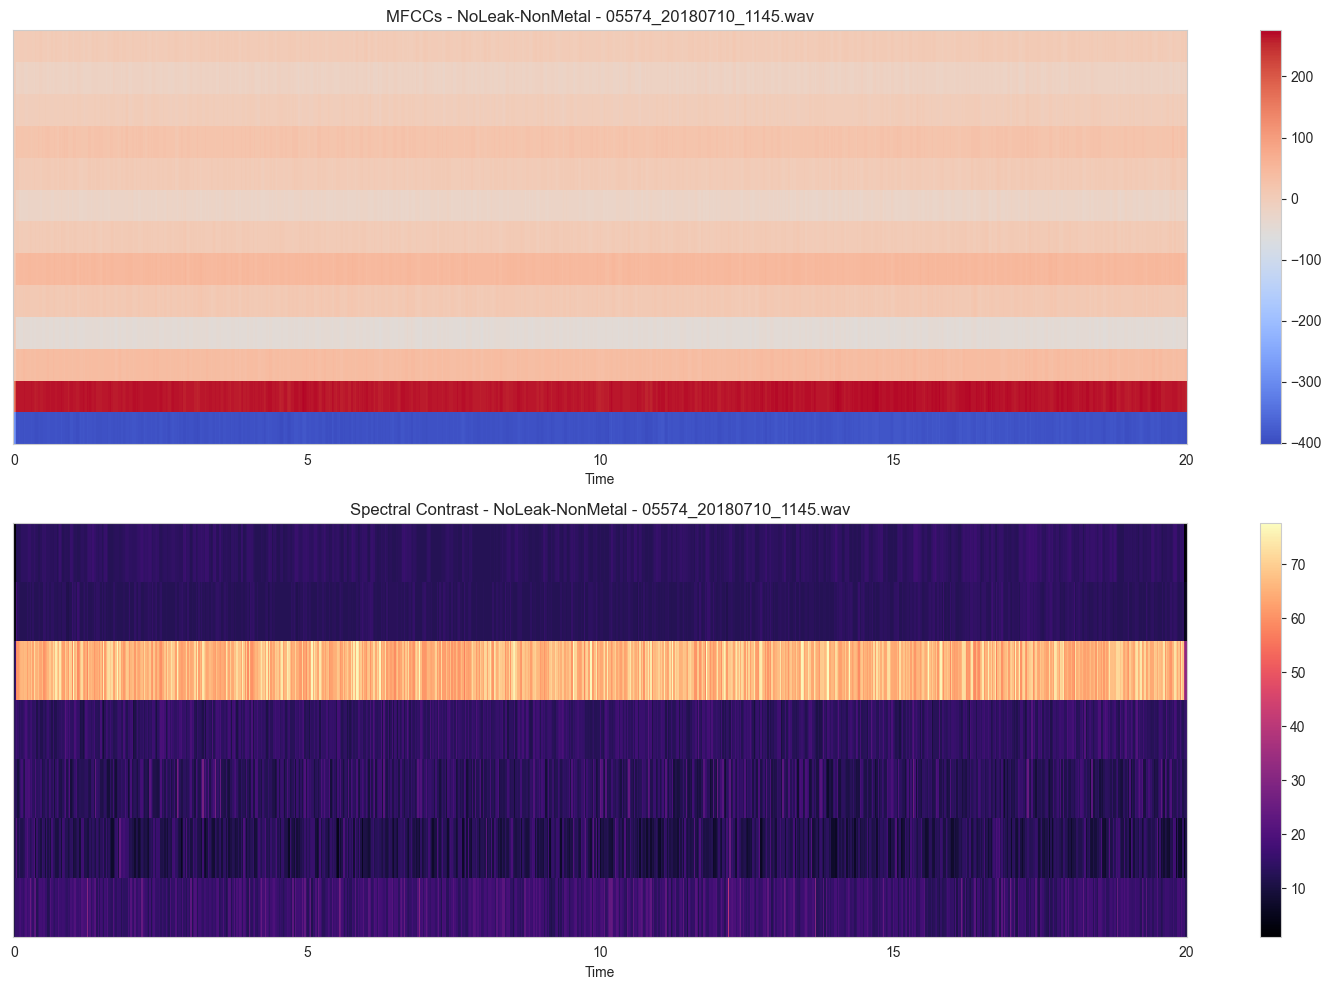

In [10]:
def plot_advanced_features(df, n_samples=1):
    sample_df = df.groupby('label').apply(lambda x: x.sample(n_samples)).reset_index(drop=True)
    
    for i, row in sample_df.iterrows():
        path = row['path']
        label = row['label']
        
        try:
            y, sr = librosa.load(path)
            
            # Extract MFCCs
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            
            # Extract Spectral Contrast
            spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
            
            plt.figure(figsize=(15, 10))
            
            # Plot MFCCs
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfccs, x_axis='time')
            plt.colorbar()
            plt.title(f'MFCCs - {label} - {os.path.basename(path)}')
            
            # Plot Spectral Contrast
            plt.subplot(2, 1, 2)
            librosa.display.specshow(spectral_contrast, x_axis='time')
            plt.colorbar()
            plt.title(f'Spectral Contrast - {label} - {os.path.basename(path)}')
            
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Could not process file {path}. Error: {e}")

# Plot one sample from each class
plot_advanced_features(df, n_samples=1)


### Inspect 'Leak-NonMetal' Class


In [ ]:
inspect_class_files(df, 'Leak-NonMetal')


### Inspect 'NoLeak-Metal' Class


In [ ]:
inspect_class_files(df, 'NoLeak-Metal')


### Inspect 'NoLeak-NonMetal' Class


In [ ]:
inspect_class_files(df, 'NoLeak-NonMetal')
